In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data_path="D:\Work_folders\code\jupyter-AIML\Projects\Capstone - Project\Data Set - industrial_safety_and_health_database_with_accidents_description.csv"

In [3]:
df=pd.read_csv(data_path)

In [4]:
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [5]:
len(df.columns)

11

In [5]:
import seaborn as sns

In [6]:
k=df.groupby("Potential Accident Level")

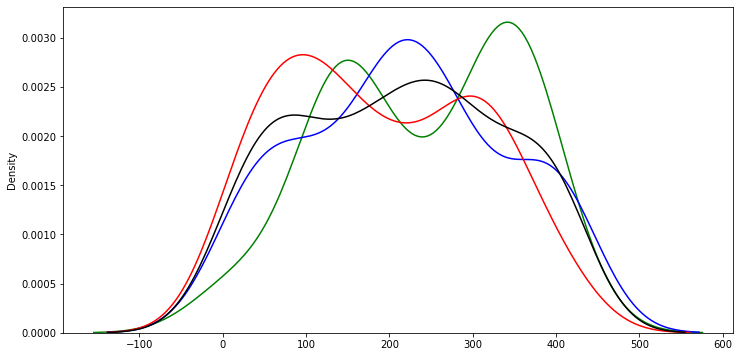

In [7]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=k.get_group("I").index,color="green")
sns.kdeplot(x=k.get_group("II").index,color="blue")
sns.kdeplot(x=k.get_group("III").index,color="red")
sns.kdeplot(x=k.get_group("IV").index,color="black")
plt.show()

In [8]:
k=df.groupby("Accident Level")

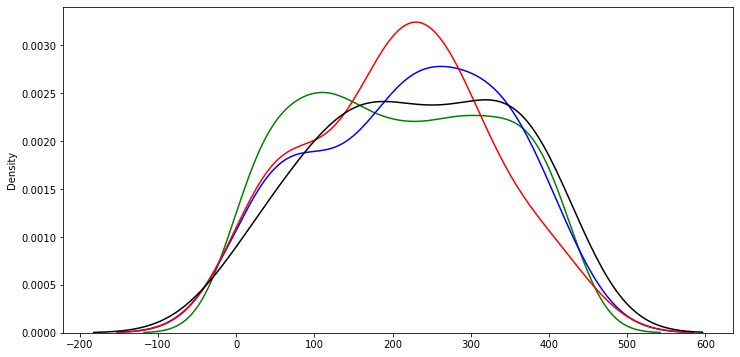

In [9]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=k.get_group("I").index,color="green")
sns.kdeplot(x=k.get_group("II").index,color="blue")
sns.kdeplot(x=k.get_group("III").index,color="red")
sns.kdeplot(x=k.get_group("IV").index,color="black")
plt.show()

In [10]:
df.drop(["Unnamed: 0","Description","Data"],axis=1,inplace=True)

In [11]:
df.head()

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [12]:
global random_state #this will be set for repeatability and will not be disturbed.
random_state=1
#This will be completely fixed and referenced everywhere
########################################################################
from sklearn.model_selection import train_test_split
x=df.drop("Potential Accident Level",axis=1) # The rest four columns create our independent columns
y=df["Potential Accident Level"]


In [13]:
x["Accident Level"].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

In [14]:
x["Accident Level"].value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

# Preparing Models for Supervised Learning

In [15]:
Models_list={}
random_state=4
#######################################################################
# No Parameters are given here for the models because we want to make it
#to the cross validation. We have included most of the supervised learning 
# method unitialized so that we can go for the treatment later on.
#
#######################################################################
#
#Logistic Regression Model and its Tuning.
#######################################################################
from sklearn.linear_model import LogisticRegression
#######################################################################
LR_model = LogisticRegression()
Models_list.update({"LogisticRegression":LR_model})
#######################################################################
######################################################################
#
#Gaussian Naive Bayes Model
#######################################################################
from sklearn.naive_bayes import GaussianNB
######################################################################
NB_model = GaussianNB()
Models_list.update({"NaiveBayes":NB_model})
#######################################################################
#######################################################################
#
#KNN Model
#######################################################################
from sklearn.neighbors import KNeighborsClassifier
#########################################################
KNN = KNeighborsClassifier()
Models_list.update({"KNN":KNN})
#######################################################################
#######################################################################
#
# Support Vector Classifier
######################################################################
from sklearn.svm import SVC
#######################################################################
support_vector = SVC(probability=True)
Models_list.update({"support_vector":support_vector})
#######################################################################
#######################################################################
#
#Decicion Tree Model
########################################################################
from sklearn.tree import DecisionTreeClassifier
#######################################################################
decision_tree=DecisionTreeClassifier()
Models_list.update({"decision_tree":decision_tree})
#######################################################################
#######################################################################
#
#Bagging Classifier
######################################################################
from sklearn.ensemble import BaggingClassifier
######################################################################
bagging=BaggingClassifier(random_state=random_state)
Models_list.update({"bagging":bagging})
#######################################################################
#######################################################################
#
#Adaboost Classifier
######################################################################
from sklearn.ensemble import AdaBoostClassifier
#####################################################################
adaboost=AdaBoostClassifier(n_estimators=100,random_state=random_state)
Models_list.update({"adaboost":adaboost})
#######################################################################
#######################################################################
#
#Gradient Boosting Classifier
########################################################################
from sklearn.ensemble import GradientBoostingClassifier
########################################################################
gradientboost = GradientBoostingClassifier(random_state=random_state)
Models_list.update({"gradientboost":gradientboost})
#######################################################################
#######################################################################
#
#Random Forest Classifier
#######################################################################
from sklearn.ensemble import RandomForestClassifier
#######################################################################
random_forest = RandomForestClassifier(random_state=random_state)
Models_list.update({"random_forest":random_forest})
#######################################################################
#######################################################################
##MPLC Classifier
#######################################################################
from sklearn.neural_network import MLPClassifier
#######################################################################
Mlpc = MLPClassifier()
Models_list.update({"MLPC":Mlpc})
#######################################################################
#######################################################################
#
#N_Support_Vector_classifier
#######################################################################
from sklearn.svm import NuSVC
#######################################################################
Nusvc=NuSVC()
Models_list.update({"NuSVC":Nusvc})
#######################################################################
########################################################################
#Models we have got loeaded into our Dictionary.
Models_list

{'LogisticRegression': LogisticRegression(),
 'NaiveBayes': GaussianNB(),
 'KNN': KNeighborsClassifier(),
 'support_vector': SVC(probability=True),
 'decision_tree': DecisionTreeClassifier(),
 'bagging': BaggingClassifier(random_state=4),
 'adaboost': AdaBoostClassifier(n_estimators=100, random_state=4),
 'gradientboost': GradientBoostingClassifier(random_state=4),
 'random_forest': RandomForestClassifier(random_state=4),
 'MLPC': MLPClassifier(),
 'NuSVC': NuSVC()}

In [16]:
x.columns,x.shape

(Index(['Countries', 'Local', 'Industry Sector', 'Accident Level', 'Genre',
        'Employee or Third Party', 'Critical Risk'],
       dtype='object'),
 (425, 7))

In [70]:
#dt=pd.read_csv("D:\\Work_folders\\code\\python-Spyder\\flask\\supervised_train.csv")

In [71]:
#y=df["Potential Accident Level"]
#x=dt.drop(["Unnamed: 0"],axis=1)

In [66]:
#de=y[y=="VI"].index[0]

#x=x.drop(de,axis=0)
#y=y.drop(de)

In [17]:
from sklearn.decomposition import PCA
###################################################
def parameter_tuning(X_train,threshold):
    parameters_to_choose=range(len(X_train.columns))
    decision_maker={}
    ####################################
    for i in parameters_to_choose:
        pca=PCA(n_components=i)
        pca.fit(X_train)
        #print("Checkpoint")
        pca_variance=pca.explained_variance_ratio_.sum()
        decision_maker.update({i:pca_variance})
    ####################################
        #print(decision_maker)
    decision_maker=pd.Series(decision_maker).diff()
    out=decision_maker[decision_maker>threshold].index.max()
    return out
#############################################################
def PCA_transform_features(X_train,no_of_components=None):
    #########################################################
    minimum_threshold=0.005 # We can tune this later for whatever value we want for components that can be neglected for their influence
    n=0 #Initialize the number of features to be 0.
    ###########################################################
    #print(no_of_components)
    if no_of_components==None:
        n=parameter_tuning(X_train,threshold=minimum_threshold)
        #print("Here in no components")
        #print(n)
    else:
        n=no_of_components
    print("No of components selected is :",n)
    pca=PCA(n_components=n,random_state=random_state)
    pca.fit(X_train)
    #print(pca.explained_variance_ratio_)
    X_trans=pd.DataFrame(pca.transform(X_train))
    return X_trans

In [73]:
x_temp=PCA_transform_features(x)

No of components selected is : 23


In [18]:
############################################################

#Random Over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

#############################################################

#################################################################
#
#Function that takes the sampling function initialized as input and gives output.
#
######################################################################
######################################################################
def sampling_output(X_train,y_train,Model=None):
    #####################################################
    if Model==None:
        from imblearn.under_sampling import RandomUnderSampler
        Model = RandomUnderSampler()
    #################################################
    Method = Model
    X_syn,y_syn=Method.fit_resample(X_train,y_train)
    ########################################################
    return X_syn,y_syn
########################################################################
########################################################################
# You can use any of the above initialized samplers to get your way. If not, it defaults to
# Random under sampling, for a very strong reason not mentioned here. IT depends turly on how 
# strongly is the majority class represented. Here it is less than 6% as we have observed before.
########################################################################
print("Before Sampling X_train Shape",x.shape)
print("Before Sampling y_train Shape",y.shape)
########################################################################
y_temp=y.copy()
x,y=sampling_output(x,y,Model=ros)
x,y=sampling_output(x,y)
#x_temp,y_temp=sampling_output(x_temp,y_temp,Model=ros)
#x_temp,y_temp=sampling_output(x_temp,y_temp)
########################################################################
#print("Afer Sampling X_temp",x_temp.shape)
print("After Sampling X ",x.shape)

Before Sampling X_train Shape (425, 7)
Before Sampling y_train Shape (425,)
After Sampling X  (858, 7)


In [29]:
t=np.expand_dims(X_test[0],axis=0)
t

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
Models_list["adaboost"].predict(t)

array(['IV'], dtype=object)

In [22]:
models_check(X_train,y_train)

The Model under trail is :  LogisticRegression
Training Score is : 0.6909620991253644
--------------------------------------
The Model under trail is :  NaiveBayes
Training Score is : 0.5699708454810496
--------------------------------------
The Model under trail is :  KNN
Training Score is : 0.706997084548105
--------------------------------------
The Model under trail is :  support_vector


C:\Users\Sheshank_Joshi\anaconda3\envs\gpu-nltk\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score is : 0.7332361516034985
--------------------------------------
The Model under trail is :  decision_tree
Training Score is : 0.814868804664723
--------------------------------------
The Model under trail is :  bagging
Training Score is : 0.8104956268221575
--------------------------------------
The Model under trail is :  adaboost
Training Score is : 0.4839650145772595
--------------------------------------
The Model under trail is :  gradientboost
Training Score is : 0.7944606413994169
--------------------------------------
The Model under trail is :  random_forest
Training Score is : 0.814868804664723
--------------------------------------
The Model under trail is :  MLPC
Training Score is : 0.8090379008746356
--------------------------------------
The Model under trail is :  NuSVC
Training Score is : 0.7565597667638484
--------------------------------------


C:\Users\Sheshank_Joshi\anaconda3\envs\gpu-nltk\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
######################################################################
#This is where the actual Model fitting starts.
#
#This is a general setup for all the models to be evaluated for a given situation.
# Please Note : We are not going for Meta-Classifier Models, so they won't be
#stacked against each other. 
#
######################################################################
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as area_under_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
#######################################################################

Model=Models_list[choice_models[0]] # For sample1
#Model2=Models_list[choice_models[1]] # For sample2
#Simply using Logistic Regression for now and separating them to keep clean

#######################################################################
# All the data will be collected here.
#
#For Sample1
comparison_of_models_matrix={}
classification_report_list={}
confusion_matrix_list={}
roc_characteristics={}
######################################################################
#For Sample2
comparison_of_models_matrix2={}
classification_report_list2={}
confusion_matrix_list2={}
roc_characteristics2={}

########################################################################
#########################################################################
#Using a separate function to extract information from the models
#
def model_information_extractor(X_train,y_train,X_test,y_test,Model_prediction):
    dictionary={}
    Accuracy=accuracy_score(y_test,Model_prediction)
    Recall=recall_score(y_test,Model_prediction,average="weighted")
    auc=area_under_curve(y_test,Model_prediction)
    dictionary.update({"Accuracy":Accuracy,"Recall":Recall,"ROC_AUC":auc})
    return dictionary
########################################################################
######################################################################### 

    
Model_prediction=Model.predict(X_test)
probability=Model.predict_proba(X_test)
#print(probability.shape)
#False_p_rate,True_p_rate,thresh=roc_curve(np.array(y_test.values.ravel()),probability[:,1])
####################################################
#confusion_matrix_list.update({Model:confusion_matrix(y_test, Model_prediction)})
comparison_of_models_matrix.update({"Model":Model,
                                    "Train_score":Model.score(X_train,y_train),
                                    "Test_score":Model.score(X_test,y_test)})
comparison_of_models_matrix.update(model_information_extractor(X_train,y_train,X_test,y_test,Model_prediction))
#roc_characteristics.update({"False_positive_rate":False_p_rate,"True_positive_rate": True_p_rate,"Threshold_rate":thresh})
#classification_report_list.update({"Model":Model,"classification_report":classification_report(y_test, Model_prediction)})

#####################################################################

NameError: name 'choice_models' is not defined

In [21]:
from sklearn.preprocessing import OneHotEncoder
################################################################
enc=OneHotEncoder(handle_unknown='ignore')
x=enc.fit_transform(x).toarray()
#######################################################################
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=random_state)
#######################################################################

X_train.shape,X_test.shape

((686, 61), (172, 61))

In [30]:
r=pd.get_dummies(x)

In [39]:
all(r.to_numpy(dtype="float")==x)

True

In [43]:
r.loc[0].to_numpy(dtype="float")

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
x[0]==r.loc[0].to_numpy(dtype="float")

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [33]:
r.shape,x.shape

((858, 61), (858, 61))

In [13]:
choice_models=['KNN', 'decision_tree', 'random_forest']
# Before going ahead, we need to check parameters. But only first 3 Models are being considered here.
# If you want to add more to the pipe, add them here, but be sure to make the parameters
# variations ready so that you can later feed them to the gridsearch Cv for model tuning.
############################################################
#for key in choice_models:
    #print("\n")
    #print(key,"\n")
    #print("\n")
    #print(Models_list[key].get_params())
    #print("\n")
    
############################################################
choice_models

['KNN', 'decision_tree', 'random_forest']

## Choosing a Select Few models for evaluation


In [14]:
#########################################################################
#
# This takes a list of models, generates data for them and then sends out
# parameters.
#
# Writing a function to cover the above in a pipeline if we want.
#########################################################################
#########################################################################
def Model_fitting_parameter_extraction(X_train,y_train,X_test,y_test,list_of_models):
    #################################################################
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import classification_report,confusion_matrix
    from sklearn.metrics import roc_auc_score as area_under_curve
    from sklearn.metrics import roc_curve, auc
    ###################################################################
    comparison_of_models_matrix=[]
    classification_report_list={}
    confusion_matrix_list={}
    #roc_characteristics={}
    ###################################################################
    #
    ########################################################################
    #########################################################################    
    for Model in list_of_models:
        try:
            Model.fit(X_train,y_train)
            #print("Step 1 : Finished")
        except:
            print("This Model doesn't fit",Model)
            continue
        Model_prediction=Model.predict(X_test)
        train_score=Model.score(X_train,y_train)
        test_score=Model.score(X_test,y_test)
        Accuracy=accuracy_score(y_test,Model_prediction)
        Recall=recall_score(y_test,Model_prediction,average="weighted")
        #area=area_under_curve(y_test,Model_prediction)
        #probability=Model.predict_proba(X_test)
        #print(probability.shape)
        #False_p_rate,True_p_rate,thresh=roc_curve(np.array(y_test.values.ravel(),probability[:,1]))
        #print("Step 2 : Finished")
        #try:
        #    confusion_matrix_list.update({Model:confusion_matrix(y_test, Model_prediction)})
        #except:
         #   confusion_matrix_list.update({Model:"NaN"})
        #print("Step 3 : Finished")
        comparison_of_models_matrix.append({"Model":Model,
                                    "Train_score":train_score,
                                    "Test_score":test_score,"Accuracy":Accuracy,"Recall":Recall})#,"ROC_AUC":area})
        #roc_characteristics.update({"False_psotive_rate":False_p_rate,"True_positive_rate": True_p_rate,"Threshold_rate":thresh})
        #classification_report_list.update({"Model":Model,"classification_report":classification_report(y_test, Model_prediction)})
    ########################################################################
    return [comparison_of_models_matrix]#[,classification_report_list,confusion_matrix_list]#,roc_characteristics]
########################################################################
########################################################################

########################################################################
#########################################################################
#This function takes a list of confusion matrices from all the models and 
#gives out a nice dataframe. We can add further functions to this to create
# and add new featues which is given as a comment here. Define the new
# functions that return a pandas series given the confusion matrix, we can
# always create new ways.
##########################################################################
###########################################################################
def confusion_matrix_df(confusion_matrix_given):
    confusion_df_all=pd.DataFrame(confusion_matrix_given)#,columns=["TP","FP","FN","TN"])
    #print(confusion_df_all)
    #true_p=confusion_df_all["TP"]
    #false_p=confusion_df_all["FP"]
    #false_n=confusion_df_all["FN"]
    #true_n=confusion_df_all["TN"]
    #confusion_df_all["Precision"]=true_p/(true_p+false_p)
    return confusion_df_all

#################################################################################
##################################################################################
#confusion_matrix_taken=[confusion_matrix_list[x] for x in confusion_matrix_list]
####################################################################################

#Model_comparison=pd.DataFrame(comparison_of_models_matrix,index=["Model"])
#Model_comparison.drop_duplicates(subset="Model",inplace=True)
#Model_complete=Model_comparison.join(confusion_matrix_df(confusion_matrix_taken))
##################################################################################
# We need to have more than one model to have a good dataframe of comparison.
# This is built for that purpose.
#Model_complete

#################################################################################
##################################################################################
def complete_df_models(X_train,y_train,X_test,y_test,Models_list):
    dtta=Model_fitting_parameter_extraction(X_train,y_train,X_test,y_test,Models_list)
    Model_comparison=pd.DataFrame(dtta[0])
    #Model_comparison.drop_duplicates(subset="Model",inplace=True)
    #Model_complete=Model_comparison.join(confusion_matrix_df(confusion_matrix_list))
    #Model_complete["f1_score"]=2*(Model_complete["Precision"]*Model_complete["Recall"])/(Model_complete["Precision"]+Model_complete["Recall"])
    ##################################################################################
    return Model_comparison#Model_complete#,dtta
#################################################################################
##################################################################################

In [15]:
mod=list(Models_list.values())

In [16]:
mod

[LogisticRegression(),
 GaussianNB(),
 KNeighborsClassifier(),
 SVC(probability=True),
 DecisionTreeClassifier(),
 BaggingClassifier(random_state=1),
 AdaBoostClassifier(n_estimators=100, random_state=1),
 GradientBoostingClassifier(random_state=1),
 RandomForestClassifier(random_state=1),
 MLPClassifier(),
 NuSVC()]

In [17]:
final=complete_df_models(X_train,y_train,X_test,y_test,Models_list=mod)

C:\Users\Sheshank_Joshi\anaconda3\envs\gpu-nltk\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sheshank_Joshi\anaconda3\envs\gpu-nltk\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
final

,Model,Train_score,Test_score,Accuracy,Recall
0,LogisticRegression(),0.677843,0.598837,0.598837,0.598837
1,GaussianNB(),0.552478,0.546512,0.546512,0.546512
2,KNeighborsClassifier(),0.725948,0.604651,0.604651,0.604651
3,SVC(probability=True),0.746356,0.645349,0.645349,0.645349
4,DecisionTreeClassifier(),0.820700,0.668605,0.668605,0.668605
5,(DecisionTreeClassifier(random_state=102886208...,0.809038,0.668605,0.668605,0.668605
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.558309,0.517442,0.517442,0.517442
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.806122,0.686047,0.686047,0.686047
8,"(DecisionTreeClassifier(max_features='auto', r...",0.820700,0.686047,0.686047,0.686047
9,MLPClassifier(),0.814869,0.686047,0.686047,0.686047


# Hyperparamters Tuning for Chosen Model

### Setting up parameters for chosen models and checking out the parameters

In [ ]:
######################################################################
parameters={"KNN":{'n_neighbors': list(range(1,20)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute')},
            
            "random_forest":{"max_depth":[3, None],
              "n_estimators":range(1,50),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "criterion": ["gini", "entropy"]},
            
            "NaiveBayes":{}}
######################################################################
#NOte that NiaveBayes doesn't have any significant parameters, I choose it that way so
#that time can be saved.

### Setting up the model_selection methods

In [ ]:
###################################################################
#Here we just demonstrate the use of these Cross validation parameters
#
#################################################################
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
##################################################################
#GridSearch CV 
##################################################################
##################################################################
gs = GridSearchCV(KNN,param_grid=parameters["KNN"],cv=10)
#####################################################################
gs.fit(X_train, y_train)
print(gs.best_params_) #Automatically gives best parameters
#print(gs.cv_results_['params'])
#print(gs.cv_results_['mean_test_score'])
####################################################################
####################################################################
#
#Randomized Search CV
###################################################################
#####################################################################
from sklearn.model_selection import RandomizedSearchCV

####################################################################
####################################################################
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(random_forest, param_distributions=parameters["random_forest"], n_iter=samples) #default cv = 3
#######################################################################
randomCV.fit(X_train, y_train)
print(randomCV.best_params_)
######################################################################
######################################################################

### Setting up the model_selection functions

In [ ]:


#######################################################################
# run randomized search
samples = 100  # number of random samples 
randomCV = RandomizedSearchCV(pipes[1][-1], param_distributions=parameters["random_forest"], n_iter=samples) #default cv = 3
randomCV.fit(X_train, y_train)
param_best=randomCV.best_params_
######################################################################
#
#The same as above, but now it is done in a more automated way, as a function.
# We can take the input from these the best parameters for each thread and decide which pipe is the best.
# Beware : This only comes to proper help if you are unable to decide which model to use.
#
#######################################################################
#######################################################################
def finding_and_set_best_params(X_train,y_train,pipe,param):
    #########################################################
    from sklearn.model_selection import RandomizedSearchCV
    #########################################################
    samples = 10  # number of random samples - Can increase randomly for accuracy
    best_param={}
    for each_pipe in pipe:
        k=RandomizedSearchCV(each_pipe, param_distributions=param[each_pipe[-1]],n_iter=samples) #default cv = 3
        k.fit(X_train,y_train)
        best=k.best_params_
        best_param.update({each_pipe:best})
        pipe.set_params(**param_best)
        k=o
    return pipe,best_param # This returns the best parameters for each thread.
#######################################################################
#######################################################################


# Final Pipeline for the Entire chosen model is to be found out.

In [ ]:
# This is a demonstration pipeline, but the original pipelines i.e. pipes_collection will not be used.
###############################################################
from sklearn.pipeline import make_pipeline
#############################################################
#############################################################
pipes=[]
for model in choice_models:
    pipes.append(make_pipeline(StandardScaler(),PCA(n_components=42),Models_list[model]))
##########################################################
#Once our threads (little pipes) are ready here, we pass the list as it is to the function we 
#generated previous that is built to deal with multiple models.



# Bottstrapping methods for Final Model Automatic Tuning

In [62]:
Model_chosen_final=pipes[1][-1] # Choose the pipeline chosen here.
##########################################################################
# Here the no of bootstrap samples is defaulted to 1000 but more increase in 
# number is recommeneded, for more variety and confidence in our model.
# The function here automatically tunes the selected pipelines for various parameters
# and sets the best parameters. We don't need to worry. From there we can directly pickle it or just
# go back and supply this validated set thread pipe back to the function characteristics for improved
# decision making.
########################################################################
########################################################################
def Bootstrap_confidence(data,model_given,n_iterations=100):
    ###################################################################
    from sklearn.utils import resample
    ######################################################################
    Model_chosen_final=model_given
    data1_final=data
    n_size = int(len(data1_final) * 0.50)    # picking only 50 % of the given data in every bootstrap sample
    stats = []
    in_values=data1_final.values # The Final data, that is combined and doesn't have test or train
    ######################################################################
    #print(type(in_values))
    for i in range(n_iterations):
        # prepare train and test sets
        train = resample(in_values, n_samples=n_size)  # Sampling with replacement 
        test = np.array([x for x in in_values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
        x_train_final=train[:,:-1]
        y_train_final=train[:,-1]
        x_test_final=test[:,:-1]
        y_test_final=test[:,-1]
        model=Model_chosen_final
        model.fit(x_train_final,y_train_final )
        # evaluate model
        predictions = model.predict(x_test_final)
        score = accuracy_score(y_test_final, predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
        #print(score)
        stats.append(score)
    return stats
#######################################################################
########################################################################

NameError: name 'pipes' is not defined